In [1]:
#Importaremos los módulos necesarios
%matplotlib inline
import numpy as np
import upv_audio
import matplotlib
import matplotlib.pyplot as plt
import math
matplotlib.rcParams['figure.figsize'] = (15.0, 7.5)
from IPython.display import Audio
#import streamlit as st



# De promedios de bloques a promedios deslizantes
En un módulo anterior vimos como es posible ir calculando la media de la señal ( o de la señal al cuadrado) a bloques. En dicho módulo los bloques eran disjuntos, es decir **no tenían solape**.

En este módulo veremos que es posible realizar el análisis con bloques que se solapan. Es decir, existirá un parámetro más del análisis que será el avance del bloque.

Cuando los bloques se solapan, los resultados que se obtienen en cada uno de ellos ya no es independiente pues gran parte de las muestras serán comunes en bloques adyacentes.

Una vez visto que los bloques pueden solaparse, el siguiente paso es hacer que el avance sea de lo mínimo posible, es decir **1 muestra**. En ese caso se habla de **promedios deslizantes**.

En este módulo veremos:
* Cálculo de promedios a bloques con solape.
* Cálculo de promedios deslizantes.
* Usaremos los promedios deslizantes para filtrar paso-bajo una señal (eliminar variaciones rápidas)



## Análisis a bloques con solape

In [2]:
# Consideremos una señal de 15 muestras 
x=np.arange(17)
print(x)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


In [3]:
# y consideraremos bloques de 5 muestras
#Vamos a ir haciendo un print con las muestras de cada bloque SIN SOLAPE:
blcksize=5
n1=0
n2=n1+blcksize
block_counter=0
while n2 <= len(x):
    print('block:', block_counter,' Muestras:',x[n1:n2])
    n1+=blcksize
    n2+=blcksize
    block_counter +=1

block: 0  Muestras: [0 1 2 3 4]
block: 1  Muestras: [5 6 7 8 9]
block: 2  Muestras: [10 11 12 13 14]


In [4]:
# Para hacer solape, lo que tengo que hacer es cambiar los incrementos para que en vez de avanzar blcksize, lo 
# hagan "avance"
blcksize=5
avance=3
n1=0
n2=n1+blcksize
block_counter=0
while n2 <= len(x):
    print('block:', block_counter,' Muestras:',x[n1:n2])
    ##############################################################
    n1+=avance # OJO !!! El cambio está aquí
    n2+=avance  # OJO !!! El cambio está aquí
    ##############################################################
    block_counter +=1

block: 0  Muestras: [0 1 2 3 4]
block: 1  Muestras: [3 4 5 6 7]
block: 2  Muestras: [ 6  7  8  9 10]
block: 3  Muestras: [ 9 10 11 12 13]
block: 4  Muestras: [12 13 14 15 16]


In [5]:
# El solape es
solape=blcksize-avance
print('solape=',solape)

solape= 2


### Potencia media por bloque con solapes
Retomaremos el ejemplo de la potencia media local. 
Haremos una función potBloque() similar a la del cuaderno anterior pero en la que tendremos los parámetros:

* x: señal
* blcksize: tamaño del bloque
* avance: cuantas muestras se avanza el bloque

Obsérvese que tomar bloques sin solape corresponde al caso $blcksize==avance$.

Compararé el efecto de usar solape o no usarlo

In [6]:
# Modificamos la función del módulo anterior para que incluya avance
def blockPot(x,blcksize,avance):
    assert x.ndim ==1 , 'Solo señales mono'
    n1=0
    n2=n1+blcksize
    pots=[] # lista vacia

    ### BEGIN SOLUTION
    while n2 <= len(x):
        muestras=x[n1:n2]
        pot=np.mean(muestras**2)
        n1+=avance
        n2+=avance
        pots.append(pot)
    ### END SOLUTION        
    #Convertir de lista Python a numpy-array
    return np.array(pots)  

In [7]:
# Cargamos una señal para probar
fs,x=upv_audio.read('audios/numeros.wav')
print(fs,x.shape)

44100 (702938,)


In [8]:
# Probamos la función hecha

blcksize=int(fs*100e-3)
print('blcksize=', blcksize)
pot_sin_solape=blockPot(x,blcksize,blcksize)

# 3/4 partes de las muestras de un bloque son las mismas que las del anterior
avance=int(blcksize/4)
pot_con_solape=blockPot(x,blcksize,avance)

blcksize= 4410


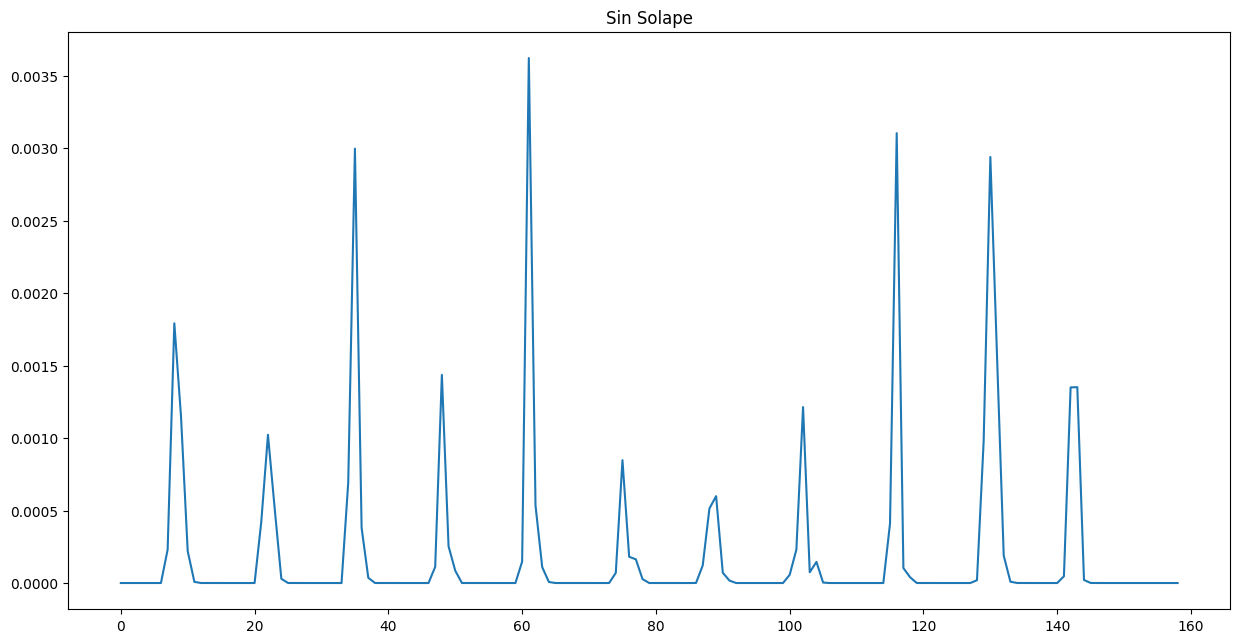

In [9]:
_=plt.plot(pot_sin_solape)
_=plt.title('Sin Solape')

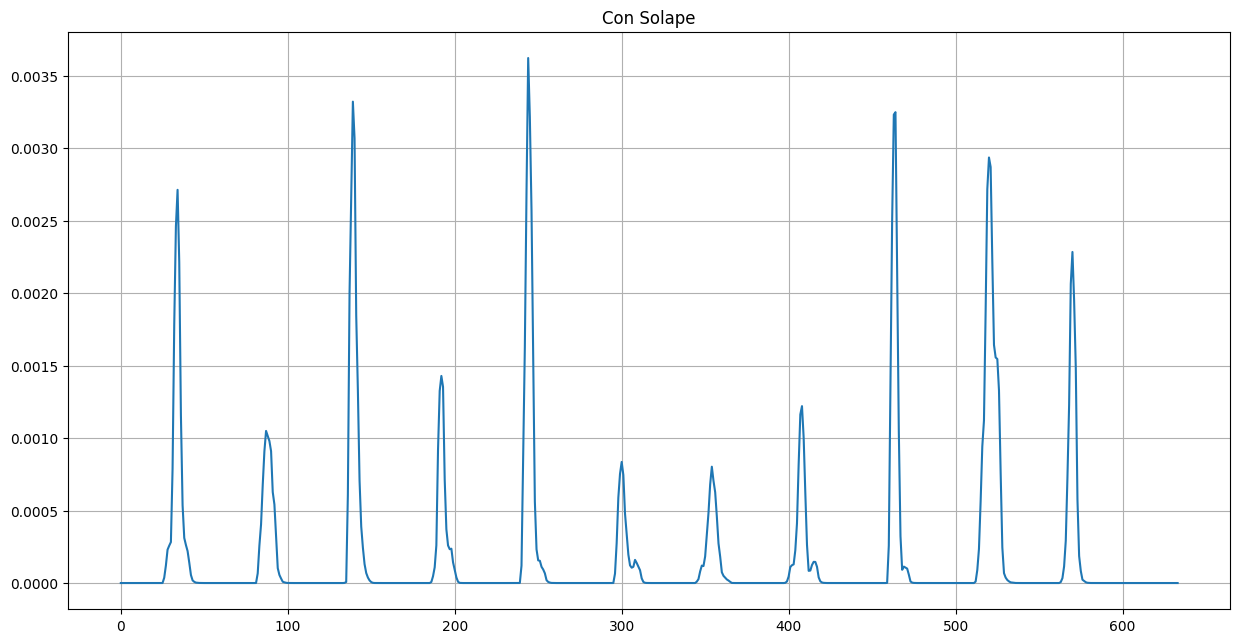

In [10]:
_=plt.plot(pot_con_solape)
_=plt.title('Con Solape')
_=plt.grid()

**Se observa:**

* Que la forma es la misma en ambos casos.
  
* Que el número de bloques con solape es aprox. 4 veces el original

* Que la forma de la curva es más suave, menos quebrada. En realidad la curva obtenida con solape es una especie de interpolación de la que no tiene solape.

In [11]:
# Celda para evaluar la función blockPot()

### BEGIN HIDDEN TESTS
# AUTOTEST blockPot(x[:300000],3000,1000)
### END HIDDEN TESTS

## Promediado de muestras
Hasta ahora hemos usado los promedios locales para promediar la señal al cuadrado (potencia instantánea) para obtener la potencia media a corto plazo.

Si:
* Se hace el avance=1
* se promedian las muestras directamente (sin elevar al cuadrado)

lo que se obtiene en cada instante es el promedio local. Esto produce el efecto de **reducir las variaciones rápidas de la señal**, entendiendo por rápido aquello que dure menos que el tiempo que estoy promediando.

Este efecto es equivalente a un filtrado paso-bajo.

Cuando se utiliza para series de datos (que no sean muestras de una señal de audio), se eliminan las fluctuaciones rápidas. EJEMPLO: Las cifras de contagios diarios por COVID son muy ruidosas. Si en cada día me fijo en la media del día actual y los 3 días anteriores y posteriores es posible seguir mejor la evolución. Lo importante NO es el valor de hoy, sino **el valor medio alrededor de hoy**.

Veamos el efecto de promediar muestras sobre una señal de audio

In [12]:
fs2,rigo=upv_audio.read('audios/rigoletto_n.wav')
print('fs= ', fs, '\nrigo.shape=', rigo.shape)
# rigo = rigo + np.random.randn(*rigo.shape)*0.03
# upv_audio.write("audios/rigoletto_n.wav",fs,rigo)
#Para centrar la atención la convertiremos a mono
rigomono=np.mean(rigo,axis=1)
print("rigoimono.shape:",rigomono.shape)

fs=  44100 
rigo.shape= (354232, 2)
rigoimono.shape: (354232,)


In [13]:
Audio(rigomono,rate=fs)

### Crear función promediado deslizante

Partiendo de la función *blockPot()* crear la función *promDeslizante()*

* Troceará la señal en bloques igual que *blockPot()*

* El avance será 1.

* En vez de calcular la potencia media de cada bloque (media de las muestras al cuadrado) calculará simplemente la media de las muestras

In [14]:
# Función evaluable

def promDeslizante(x,blcksize):
    '''
    x: muestras de entrada. Señal mono
    blcksize: tamaño de muestras a promediar

    consideraremos avance=1
    '''
    assert x.ndim ==1 , 'Solo señales mono'

    medias=[] # lista vacia

    ### BEGIN SOLUTION
    n1=0
    n2=n1+blcksize
    
    while n2 <= len(x):
        muestras=x[n1:n2]
        media=np.mean(muestras)
        n1 += 1
        n2 += 1
        medias.append(media)
    #Convertir de lista Python a numpy-array
    ### END SOLUTION
    return np.array(medias)


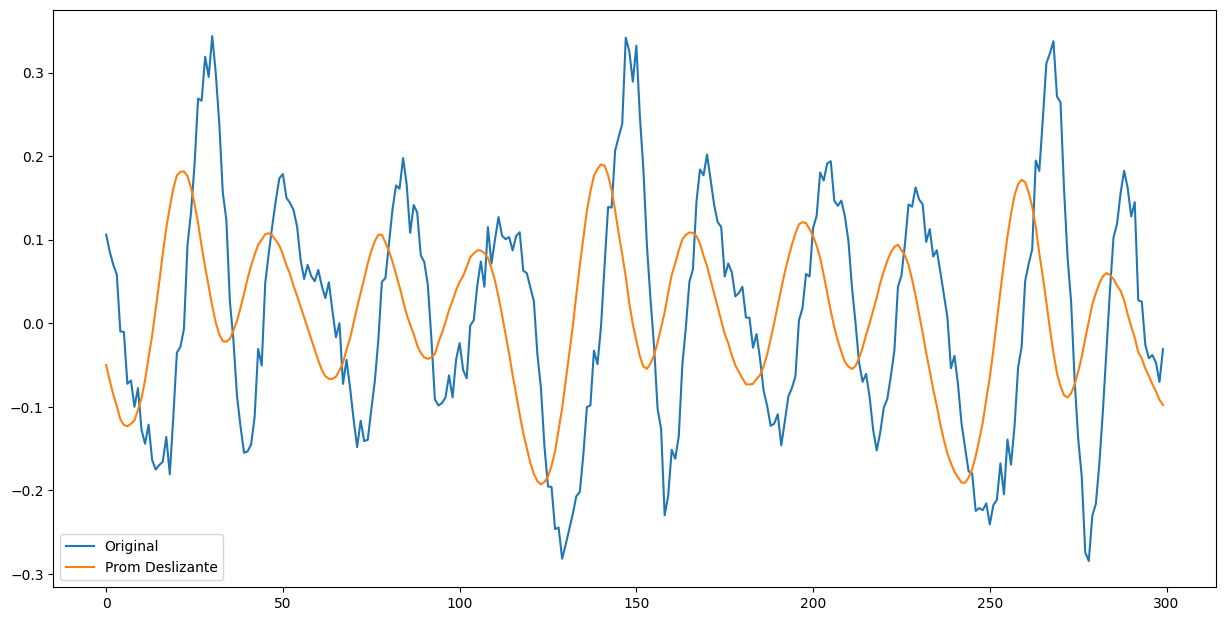

In [15]:
# Celda para probar la función y ver el efecto que produce el promediado deslizante en una señal

avgsize=15 # El tamaño de promediado equivale al tamaño del bloque sobre el que se calculan medias
rigomean=promDeslizante(rigomono,avgsize)

#Representemos un fragmento de 200 muestras a ver qué pinta tiene
_=plt.plot(rigomono[200000:200300])
_=plt.plot(rigomean[200000:200300])
_=plt.legend(['Original', 'Prom Deslizante'])


# ESCUCHE : Audición del efecto de un promediado deslizante en una señal de audio
Audio(rigomean,rate=fs)


#### Observaciones
* La señal media, tiene menos agudos que la original
* La señal media tiene menos ruido que la original
* Equivale a un filtrado paso-bajo de frec. de corte 44100/15=2940
* En la gráfica  podemos ver comparada la señal originaly la media local. Podemos observar:
  * Que las variaciones rápidas de la señal azul han sido *alisadas*
  * Existe un cierto desplazamiento temporal. Esto se debe a que la media de los instantes 0:14 se está colocando en el instante cero de la salida en vez de en el instante 7 (adelanto de 7 muestras). Este efecto no es importante en este momento y sería fácilmente corregible. Más adelante se hablará de promedios centrados o causales. Es posible compensar ese retardo representando un intervalo ligeramente distinto de las señales.
  * El retardo normalmente **NO es importante SALVO** que se vaya a comparar la señal original con la promediada.

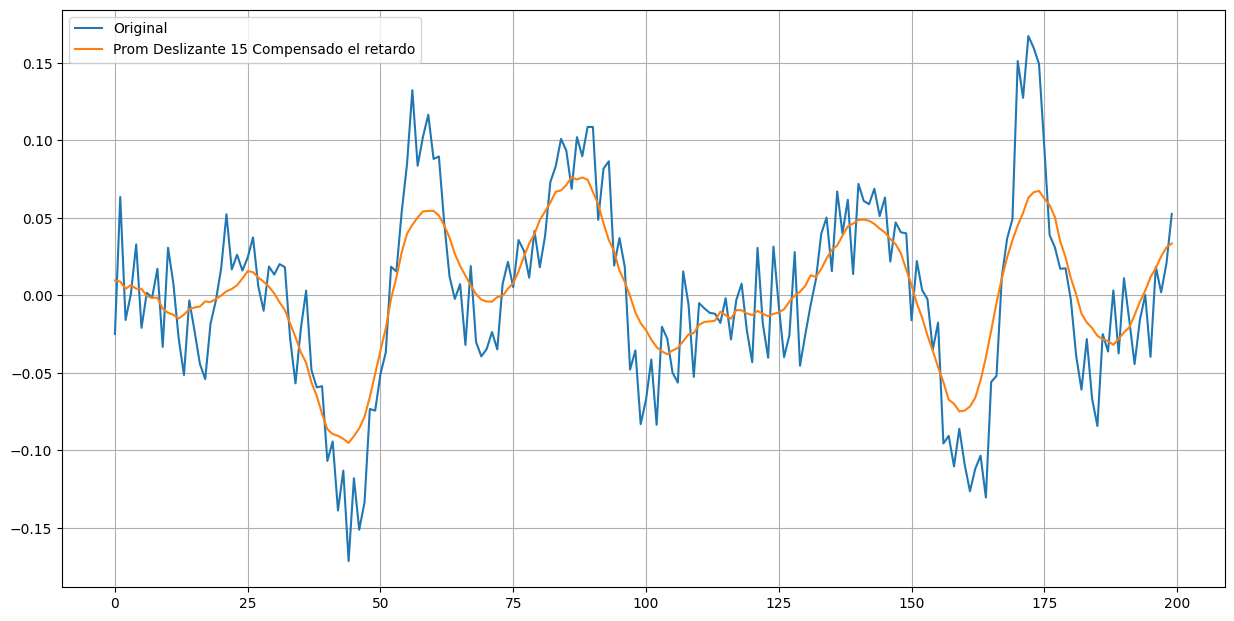

In [16]:
# Compensación del retardo
_=plt.plot(rigomono[100000:100200])
_=plt.plot(rigomean[99993:100193])
_=plt.legend(['Original', 'Prom Deslizante 15 Compensado el retardo'])
_=plt.grid()

In [17]:
# Celda para corrección automática

### BEGIN HIDDEN TESTS
_,kk=upv_audio.read('audios/rigoletto_n.wav')
kk=np.mean(kk,axis=1)
### AUTOTEST promDeslizante(kk,19)
### AUTOTEST promDeslizante(kk[-50000:],13)
### END HIDDEN TESTS

### Efecto del cambio del tamaño del promediado
En este apartado estudiaremos qué sucede si variamos el tamaño del promediado. Para ello, lo que haremos será promediar el doble de muestras que en el caso anterior. 

A continuación escucharemos el audio y observaremos el mismo fragmento de muestras

In [18]:
avgsize2=31
rigomean2=promDeslizante(rigomono,avgsize2)

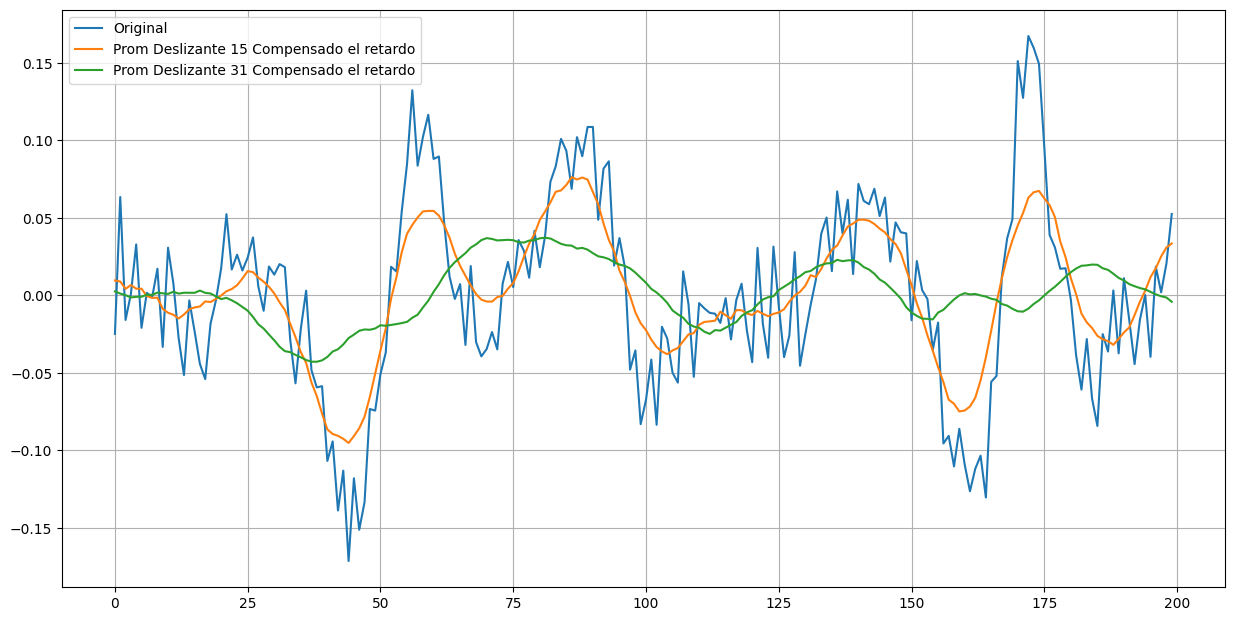

In [19]:
#Representación con retardo compensado. El retardo ahora son 15
_=plt.plot(rigomono[100000:100200])
_=plt.plot(rigomean[99993:100193])
_=plt.plot(rigomean2[99985:100185])

_=plt.legend(['Original',  'Prom Deslizante 15 Compensado el retardo', 'Prom Deslizante 31 Compensado el retardo'])
_=plt.grid()
# Escuche como suena si se aumenta el tiempo de promediado
Audio(rigomean2,rate=fs)

In [20]:
# Celda de corrección automática
### BEGIN  TESTS
assert 'rigomean' in locals(), "rigomean no existe"
assert 'rigomean2' in locals(), "rigomean2 no existe"

### END  TESTS

#### Observaciones
* Podemos ver que la señal se ha suavizado más.
* Al aumentar el tamaño del suavizado la señal se parece menos a la original
* Se escuchan menos agudos
